In [1]:
rainfall spatially dependent

SyntaxError: invalid syntax (3962838475.py, line 1)

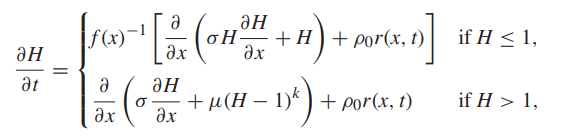

In [18]:
import numpy as np
import matplotlib.pyplot as plt

L=1 # length of domain
nx = 201 # number of grid points
dx =   L/ (nx-1) # grid space 
x = np.linspace(0,L,nx) # coordinates of the grid points


from scipy.sparse import diags

def d1_mat(nx,dx): # matrix representing central finite differences for the first derivative
    diagonals = [[-1./2.], [0], [1./2.]] # main diagonal elements
    offsets = [-1, 0, 1]# positions of the elements with the respect to the diagonal
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx
def d2_mat(nx,dx):
    diagonals = [[1],[-2],[1]]
    offsets = [-1,0,1]
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx**2

d1mat = d1_mat(nx,dx)
d2mat = d2_mat(nx,dx)
print (d1mat)


[[   0.  100.    0. ...    0.    0.    0.]
 [-100.    0.  100. ...    0.    0.    0.]
 [   0. -100.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.  100.    0.]
 [   0.    0.    0. ... -100.    0.  100.]
 [   0.    0.    0. ...    0. -100.    0.]]


In [19]:
def d1_mat(nx,dx): # matrix representing central finite differences for the first derivative
    diagonals = [[-1./2.], [0], [1./2.]] # main diagonal elements
    offsets = [-1, 0, 1]# positions of the elements with the respect to the diagonal
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx
def d2_mat(nx,dx):
    diagonals = [[1],[-2],[1]]
    offsets = [-1,0,1]
    mat = diags(diagonals, offsets, shape=(nx,nx)).toarray()
    return mat /dx**2

d1mat = d1_mat(nx,dx)
d2mat = d2_mat(nx,dx)
print (d1mat)

[[   0.  100.    0. ...    0.    0.    0.]
 [-100.    0.  100. ...    0.    0.    0.]
 [   0. -100.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.  100.    0.]
 [   0.    0.    0. ... -100.    0.  100.]
 [   0.    0.    0. ...    0. -100.    0.]]


In [20]:
#euler method 
mu=100 
rho0=0.6
sigma=0.1 
f=0.5

tf =4 # final time
dt=0.00005 # time step
nt=int(tf/dt) # number of time intervals 
H= np.empty([nt+1,nx])# creates an array for solution
J= np.empty([nt+1,nx])
K= np.empty([nt+1,nx])
Q= np.empty([nt+1,nx])
#for i in range(nt):
    #H[i+1]= H[i]+dt*((1/f)(sigma*np.dot(d1mat@H[i],d1mat@H[i]) + sigma*H*d2mat@H+ d1mat@H +rho0*r)) 
    
    #H[i+1]= H[i]+dt *(sigma*d2mat@(1/2*H**2)+H



In [26]:

x = np.linspace(0,1,nx) # coordinates of the grid points
H[0]= 1-x
r=2*x
#r=2-2*x

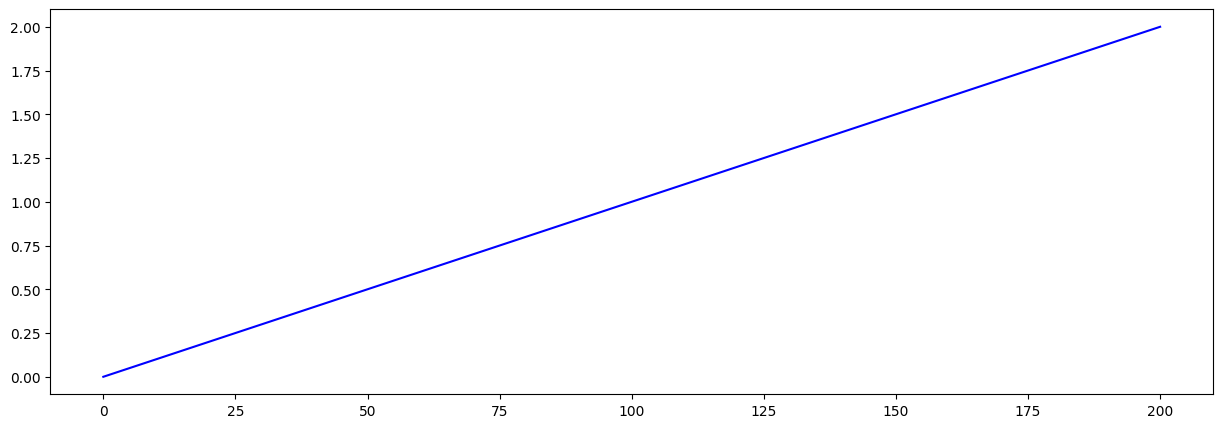

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
line,=ax.plot(r,color='blue',label='initial condition')

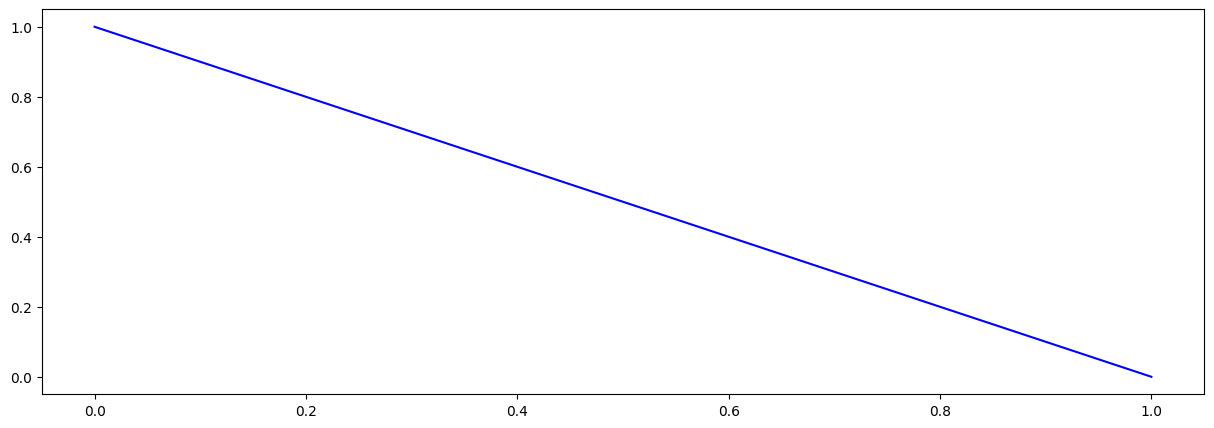

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
line,=ax.plot(x,H[0],color='blue',label='initial condition')

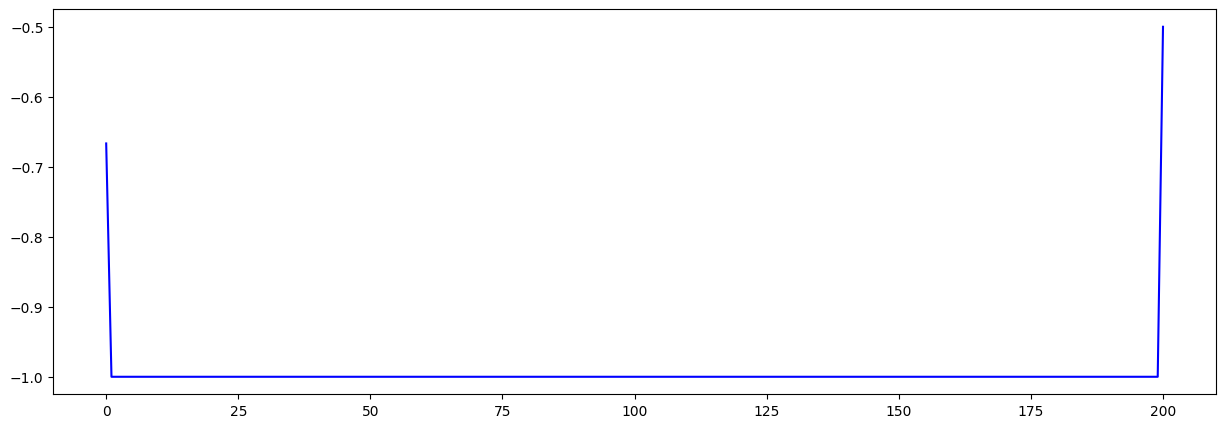

In [386]:
#A[0, 0:2] = np.array([-2./3., 2./3.]) / dx**2
#H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]
d1mat[0,0:2]= np.array([-2./3.,2./3.])/dx
 
fig, ax = plt.subplots(figsize=(15,5))
line,=ax.plot(d1mat@H[0],color='blue',label='initial condition')

In [178]:
'''#plotD[J0]/dx  versus 1/J0
data['y_p'] = np.diff(data['y']) / np.diff(data['x'])
data['x_p'] = (np.array(data['x'])[:-1] + np.array(data['x'])[1:]) / 2

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(data['x'], data['y'], 'r')
plt.plot(data['x_p'], data['y_p'], 'b')
plt.show()'''

NameError: name 'data' is not defined

In [29]:
#rainfall spatially dependent

def fn(H): 
    u=H*H/2
    v= sigma*(d2mat@u)+d1mat@H +rho0*r
    return((v/f))
    

In [152]:
'''def fn(H):
    v=sigma*H*(d1mat@H)+H
    
    return((1/f)*d1mat@v)'''

'def fn(H):\n    v=sigma*H*(d1mat@H)+H\n    \n    return((1/f)*d1mat@v)'

without seapage

In [153]:

'''print(nt)

for i in range(nt):
    H[i+1]=H[i]+fn(H[i])*dt 
    #H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions
    H[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H
    H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(15,5))
        line,=ax.plot(H[i],color='blue',label='height') '''

"print(nt)\n\nfor i in range(nt):\n    H[i+1]=H[i]+fn(H[i])*dt \n    #H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions\n    H[i+1,0]=1\n    #H[i+1,nx-1]=0 #simplified\n    #H\n    H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0\n    if i%(nt/10)==0:\n        fig, ax = plt.subplots(figsize=(15,5))\n        line,=ax.plot(H[i],color='blue',label='height') "

with seapage

In [30]:
r= 2*x
def seep(H): 
    c= sigma*d2mat@H + mu*5/3*(np.abs(H-1))**(2/3) *(d1mat@H)+rho0*r  #using a linear approximation
    return (c)
 
    
    

In [13]:
'''print(nt)

for i in range(nt):
    H[i+1]=H[i]+seep(H[i])*dt 
    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions
    #H[i+1,0]=1
    H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= -1/sigma +1  #without seapage
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(15,5))
        line,=ax.plot(H[i],color='blue',label='height')'''

"print(nt)\n\nfor i in range(nt):\n    H[i+1]=H[i]+seep(H[i])*dt \n    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions\n    #H[i+1,0]=1\n    H[i+1,nx-1]=0 #simplified\n    #H[i+1,nx-1]= -1/sigma +1  #without seapage\n    if i%(nt/10)==0:\n        fig, ax = plt.subplots(figsize=(15,5))\n        line,=ax.plot(H[i],color='blue',label='height')"

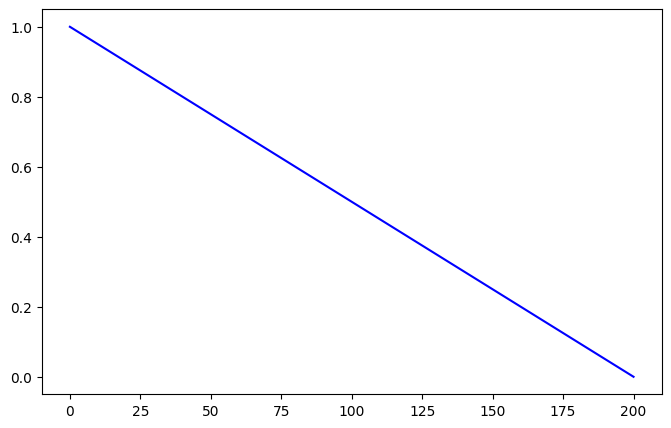

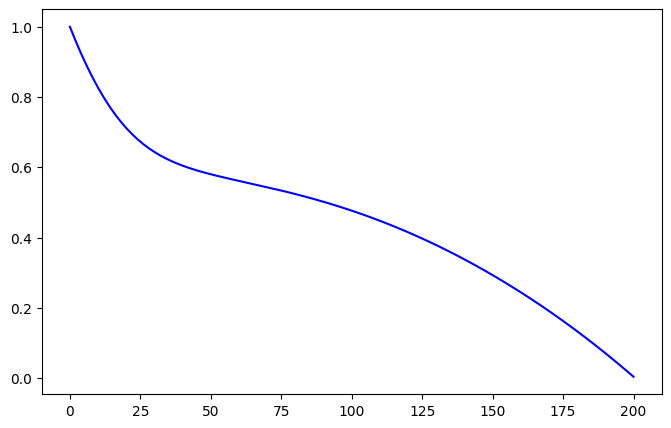

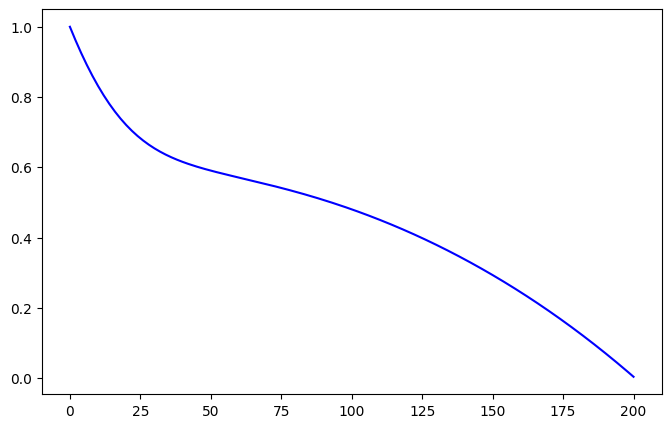

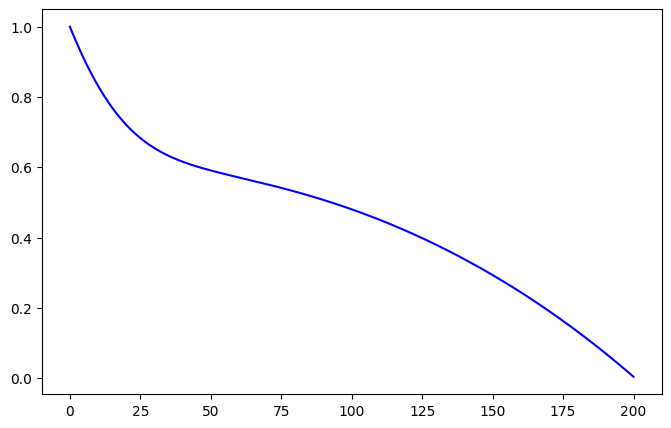

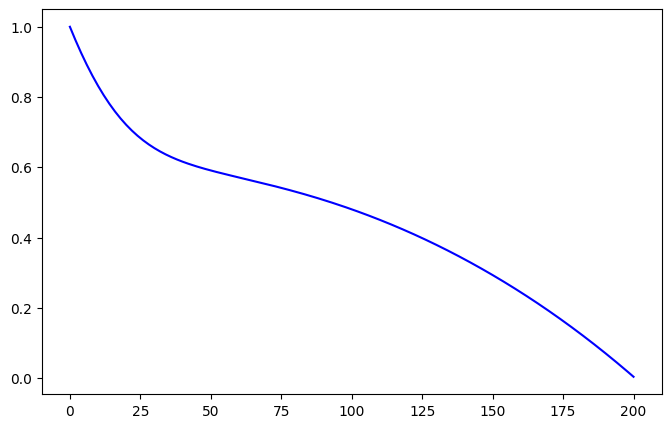

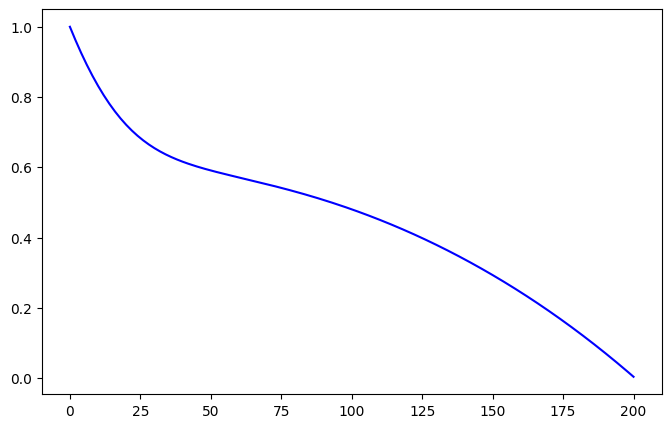

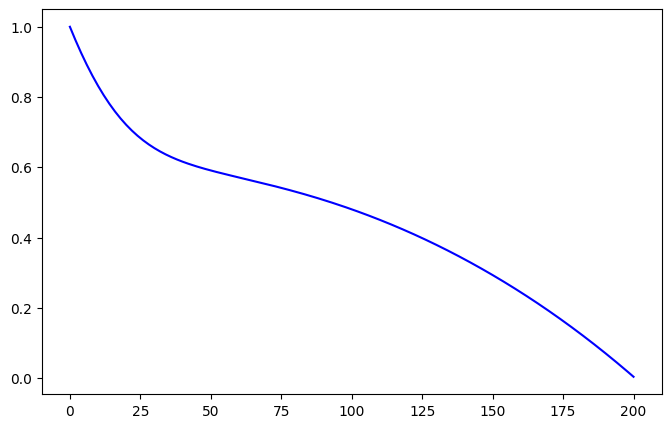

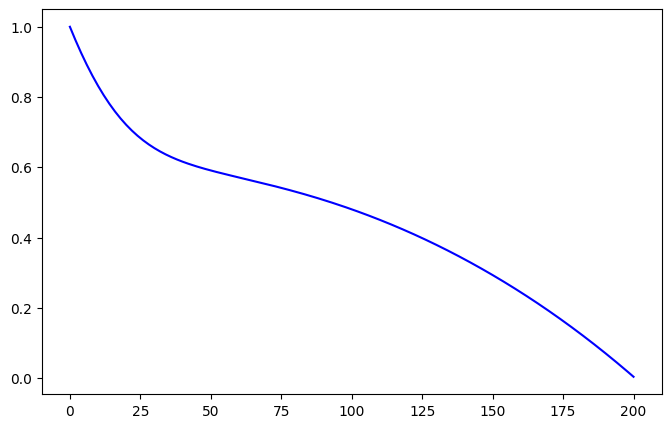

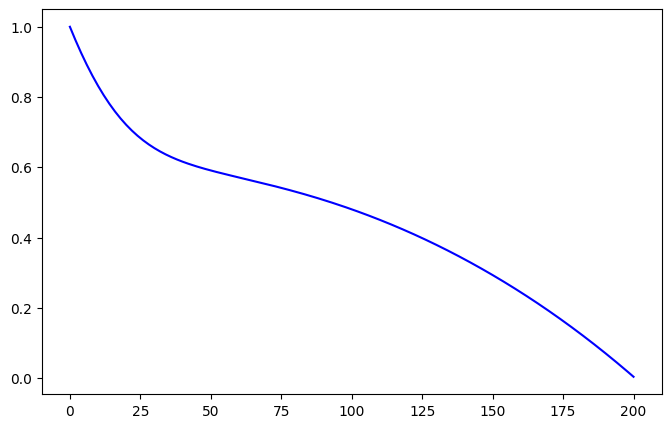

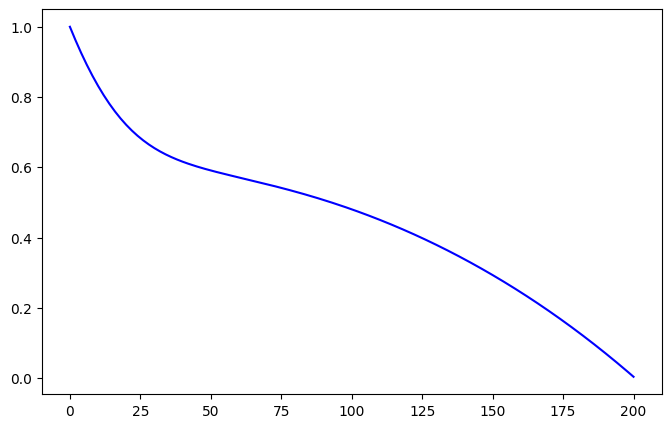

In [31]:
#the part relating to H>1 multiplied by (sign(H-1)+1)/2

#the part relating to H<1 multiplied by (sign(1-H)+1)/2
#Q[nx+1/2] =0
d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(nt):
    H[i+1]=H[i]+seep(H[i])*dt*(np.sign(H[i]-1)+1)/2 +fn(H[i])*dt*(np.sign(1-H[i])+1)/2
    H[i+1,0]=4.0/3.0*H[i+1,1]-1/3*H[i+1,2]# implementing boundary conditions
    if H[i+1,0]<=1 :    
        H[i+1,0]=1
    #H[i+1,nx-1]=0 #simplified
    #H[i+1,nx-1]= (-dx/(sigma) -1/2*H[i+1,nx-3]+2*H[i+1,nx-2])*2.0/3.0
    
    
    
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(8,5))  
        line,=ax.plot(H[i],color='blue',label='height')
        ''' legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')
        ax.set_xlim(0., T)
        ax.set_ylim(0., N/4)'''


'ax.set_xlim(0., T)\nax.set_ylim(0., N/4)'

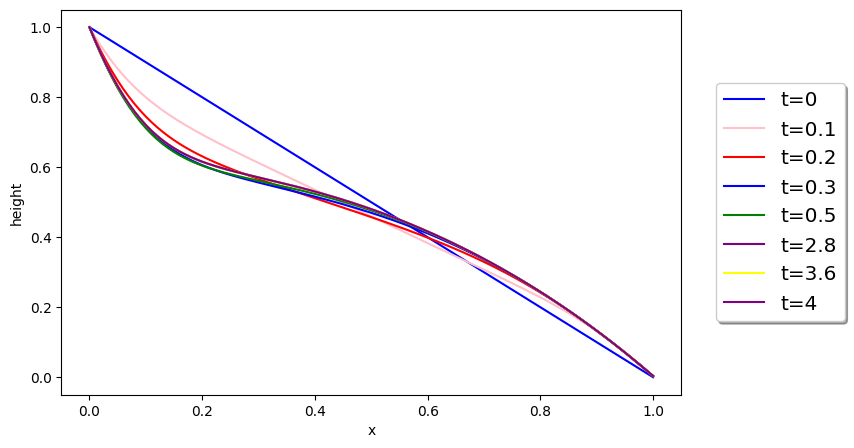

In [32]:
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(x,H[0],color='blue',label='t=0')
line,=ax.plot(x,H[2000],color='pink',label='t=0.1')
line,=ax.plot(x,H[4000],color='red',label='t=0.2')
line,=ax.plot(x,H[6000],color='blue',label='t=0.3')
line,=ax.plot(x,H[int(nt/10)],color='green',label='t=0.5')
line,=ax.plot(x,H[7*int(nt/10)],color='purple',label='t=2.8')
line,=ax.plot(x,H[9*int(nt/10)],color='yellow',label='t=3.6')
line,=ax.plot(x,H[nt],color='purple',label='t=4')
legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')
plt.xlabel('x')
plt.ylabel('height')
'''ax.set_xlim(0., T)
ax.set_ylim(0., N/4)'''


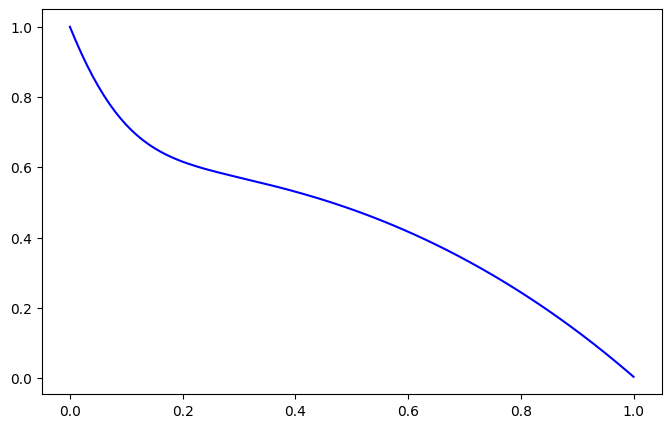

In [33]:
#plot graph at final time as the initial condition.
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(x,H[nt],color='blue',label='height' )

In [34]:
rho=0.6
def fr(y,W):
    if W<=1:
        d= 1/sigma*((rho/W)*(1-y**2)-1)
    if W>1:
        d=1/sigma*(rho*(1-y**2)-1-mu*(W-1)**k)
    
    return (d)


1.0
0.0013871449159742722


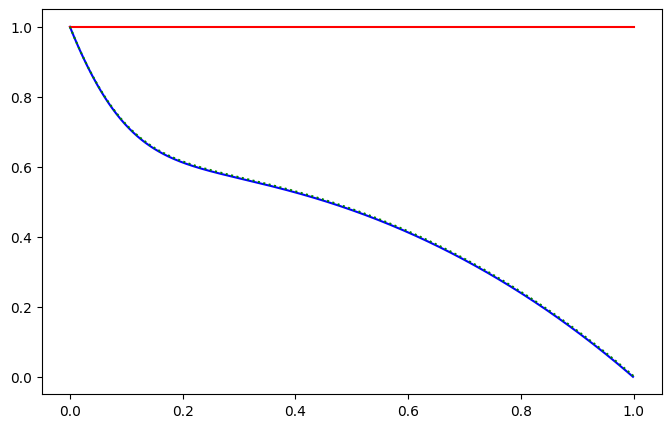

In [38]:
nnx= 1001
mu= 100 
rho=0.6
k=5/3
y=np.linspace(0,1,nnx)
W=np.empty([nnx])

ddx= 1/(nnx-1)
W[0]=1
O=np.empty(nnx)

for j in range(nnx):
    O[j]=1


if rho>1:
    W[0]=((rho-1)/100.0)**(3/5.0)+1
    


for i in range(nnx-1):
    k1 = ddx*fr(y[i],W[i])
    k2 = ddx*fr(y[i]+ddx/2,W[i]+0.5*k1)
    k3= ddx*fr(y[i]+ddx/2,W[i]+0.5*k2)
    k4= ddx*fr(y[i]+ddx,W[i]+k3)
    W[i+1] =W[i] + 1/6 *k1 + 1/3 *(k2+k3) +1/6 *k4 
    
#for i in range(nnx-10,nnx-1):
   # W[i+1]=W[i]+fr(y[i],W[i])*ddx
    
    
        
    
fig, ax = plt.subplots(figsize=(8,5))
line,=ax.plot(y[:nnx-1],W[:nnx-1], color='blue')
line,=ax.plot(y,O, color='red', linestyle= 'solid')
line,=ax.plot(x,H[nt],color='green',label='height', linestyle= 'dotted')
print(W[0])
print(W[nnx-2])

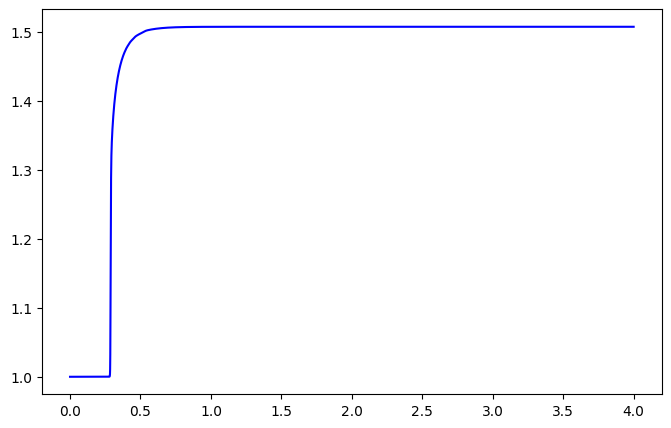

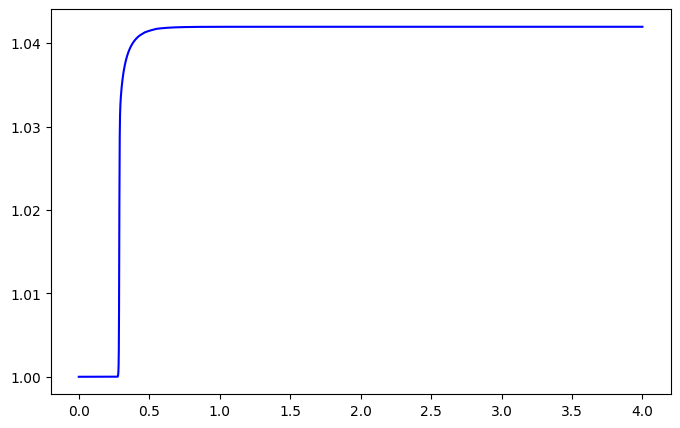

In [191]:
t= np.linspace(0,tf,nt-1)
for j in range(nt-1):
    Q[j,0]=1+mu*(H[j,0]-1)**(5/3) 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t,Q[:nt-1,0],color='blue',label='height') 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(t,H[:nt-1,0],color='blue',label='height')

In [47]:
r=1

1.0
0.1607506197858561
-7.49999392512297e-06


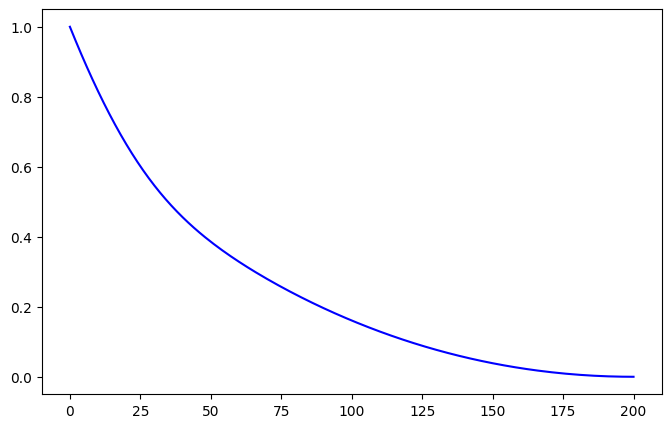

In [15]:
#use the above as the initial condition
for i in range(nx):
    J[0,i]=H[nt,i]
    
print(J[0,0])
print(J[0,100])
print(J[0,200])
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(J[0],color='blue',label='height')

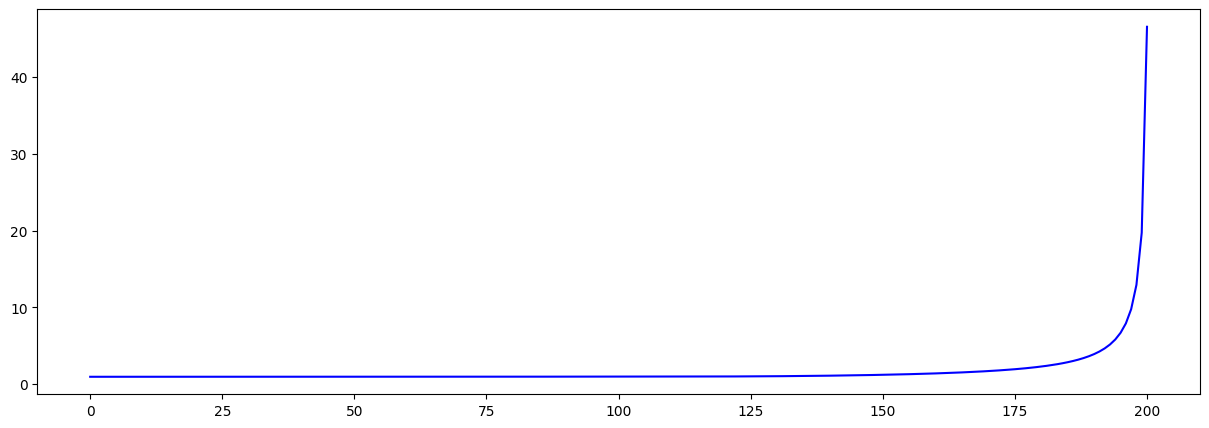

In [75]:
fig, ax = plt.subplots(figsize=(15,5))  
line,=ax.plot(1/J[0],color='blue',label='height')

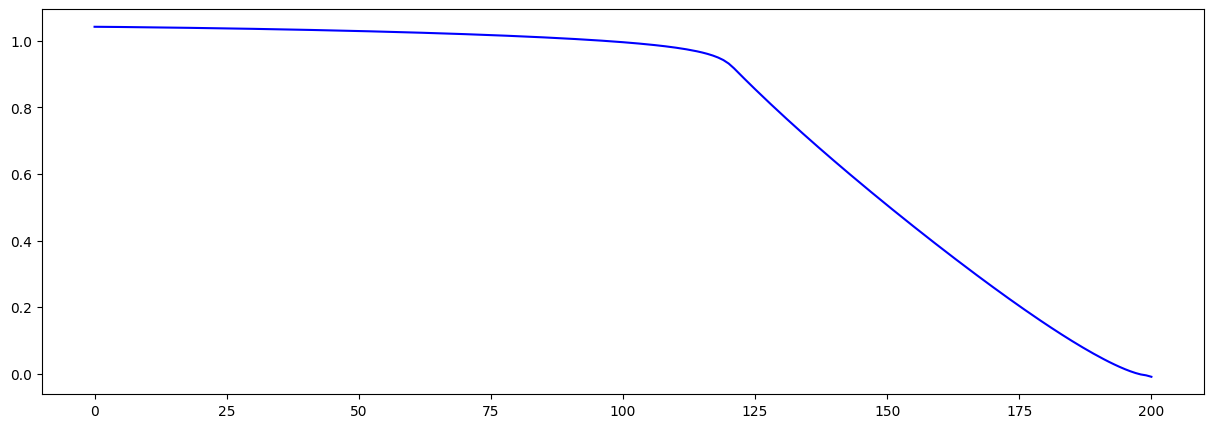

In [50]:
d1mat[0,0:3]= np.array([-1.5,2,-0.5])/dx
s= sigma*(J[0])*d1mat@(J[0])+J[0]
fig, ax = plt.subplots(figsize=(15,5))  
line,=ax.plot(s,color='blue',label='height')

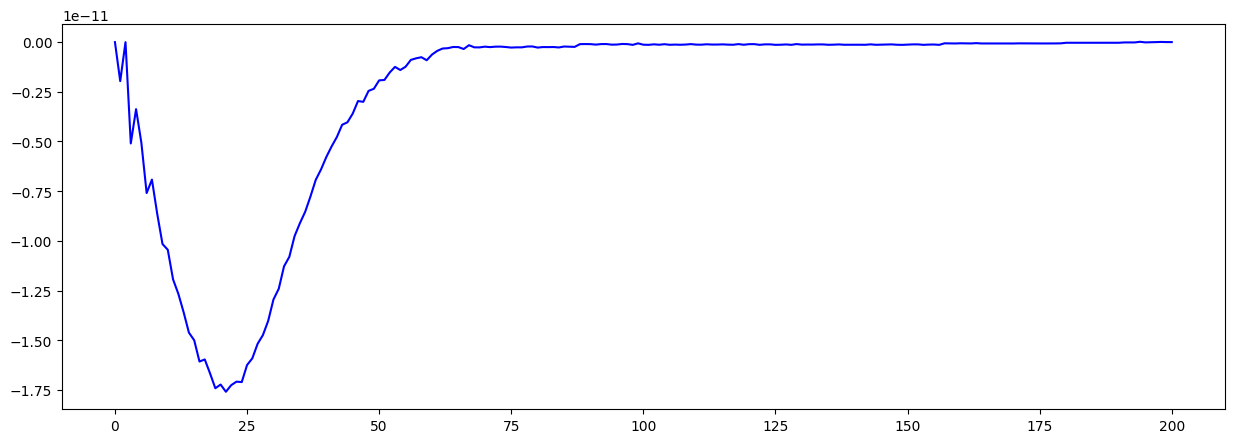

In [15]:
ini=fn(J[0])
ini[0]=0
ini[nx-1]=0
fig, ax = plt.subplots(figsize=(15,5))  
line,=ax.plot(ini,color='blue',label='height')

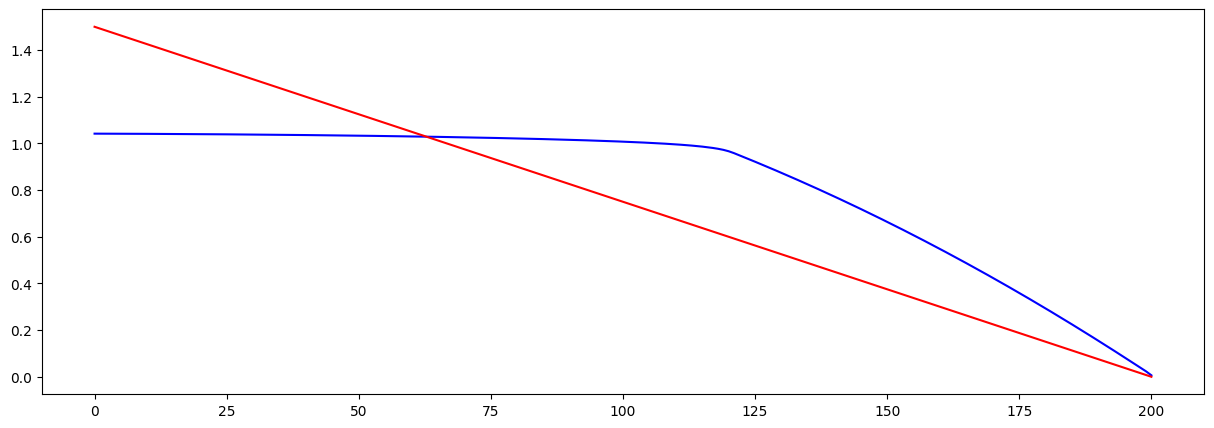

In [76]:
b= 0.5*J[0]**2
d1mat[0,0:3]= np.array([-1.5,2,-0.5])/dx
s= sigma*d1mat@(b)+J[0]
fig, ax = plt.subplots(figsize=(15,5))  
line,=ax.plot(s,color='blue',label='height')
  
line,=ax.plot(rho0*(1-x),color='red',label='height')

In [ ]:
J[0]+(rho-rho0)*t

In [ ]:
Q[n+1]= sigma*(H[n]+H[n+1])(H[n+1]-H[n])/(2*dx) + (H[n+1]+H[n])*0.5=0


In [ ]:
#plotD[J0]/dx  versus 1/J0
data['y_p'] = np.diff(data['y']) / np.diff(data['x'])
data['x_p'] = (np.array(data['x'])[:-1] + np.array(data['x'])[1:]) / 2

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(data['x'], data['y'], 'r')
plt.plot(data['x_p'], data['y_p'], 'b')
plt.show()

In [16]:
r=1
rho0=1.5    
def seep(J): 
    c= sigma*d2mat@J + mu*5/3*(np.abs(J-1))**(2/3) *(d1mat@J)+rho0*r   #using a linear approximation
    return (c)

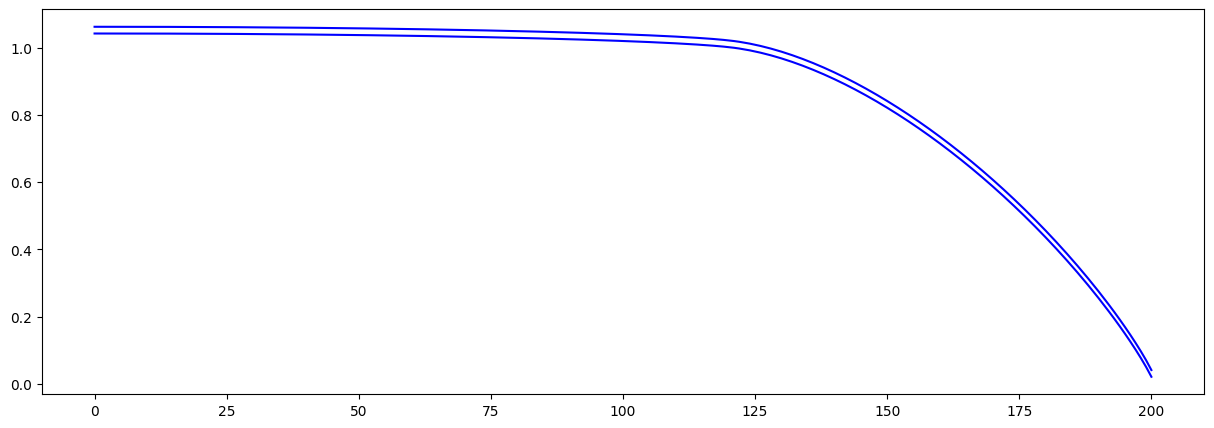

In [175]:
#a= J[0]+(rho-rho0)*t
fig, ax = plt.subplots(figsize=(15,5)) 
line,=ax.plot(J[0]+(rho0-0.6)*0,color='blue',label='height')

line,=ax.plot(J[0]+(rho0-0.6)*0.05,color='blue',label='height')


0.004594305813599582
-1.8377223660126014


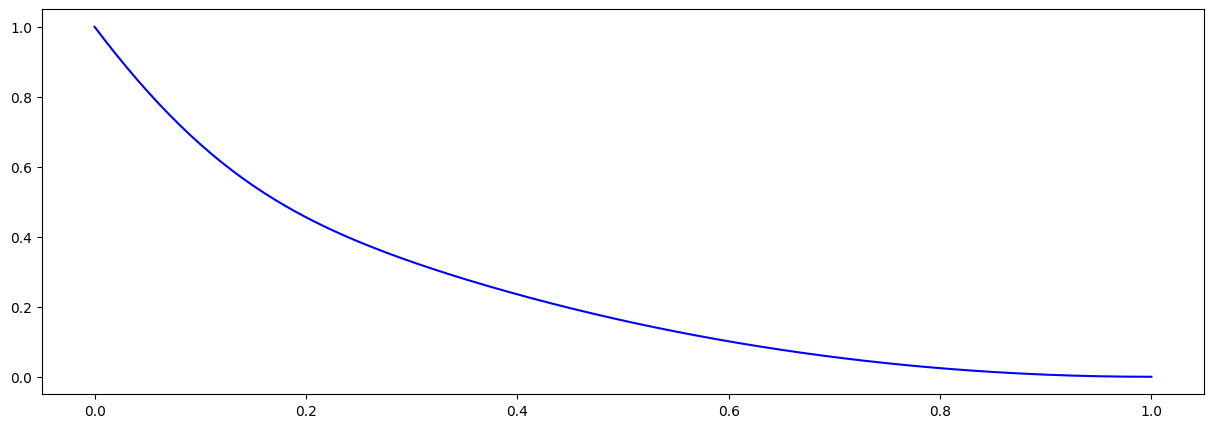

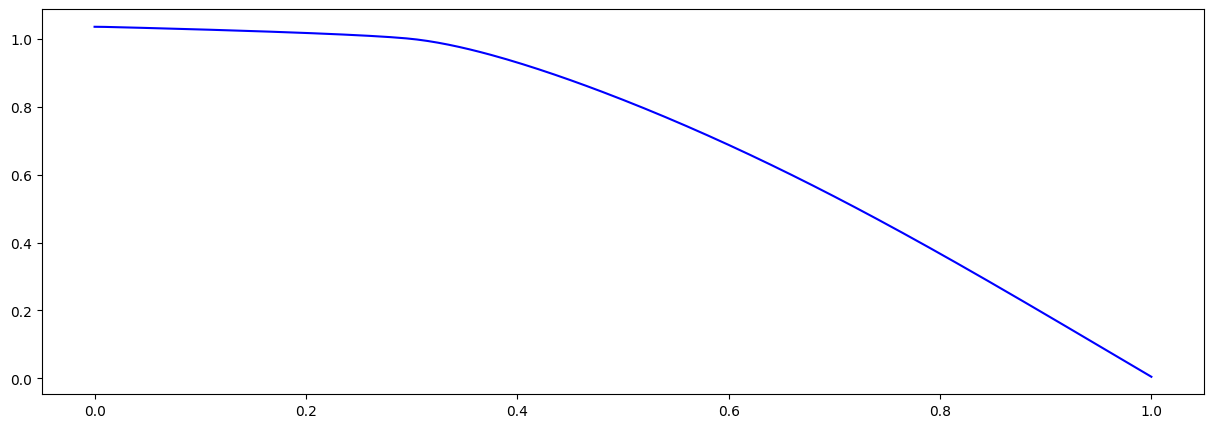

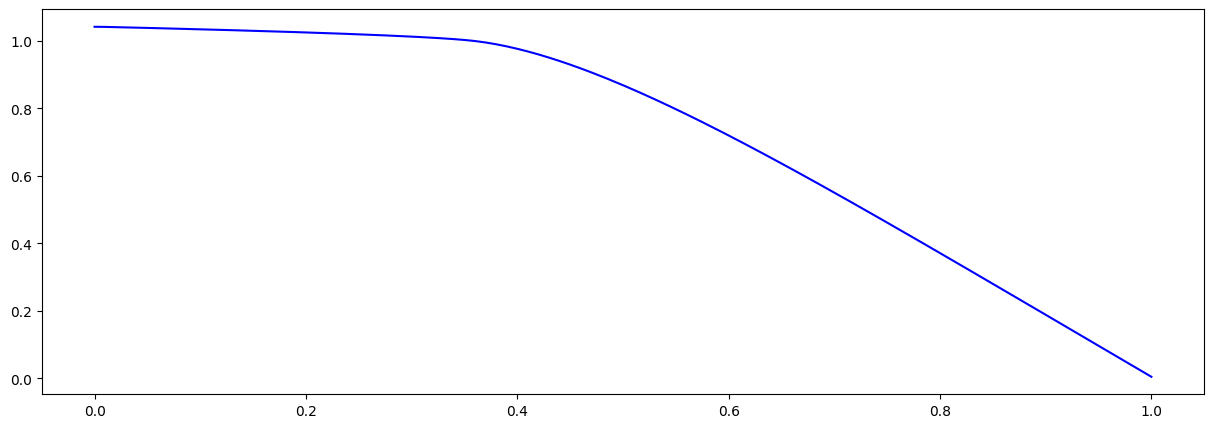

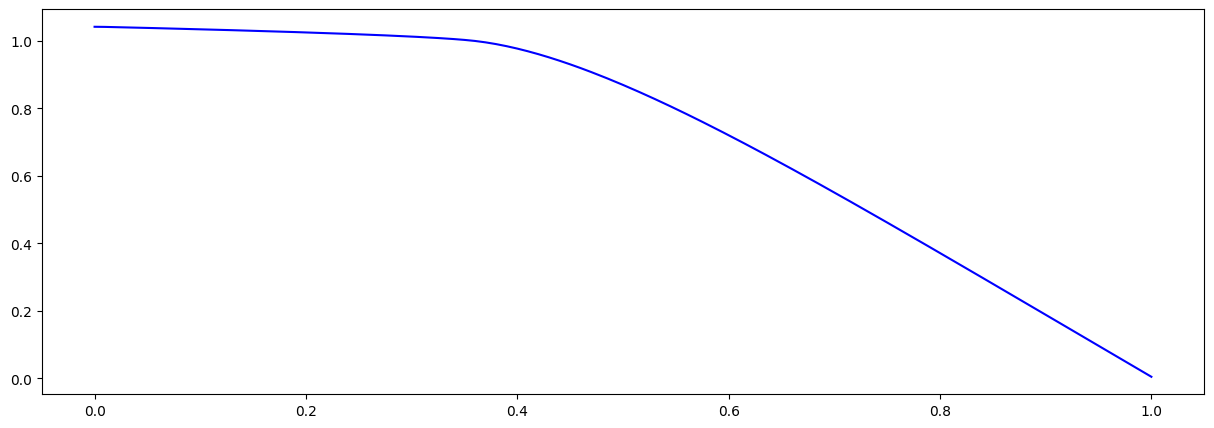

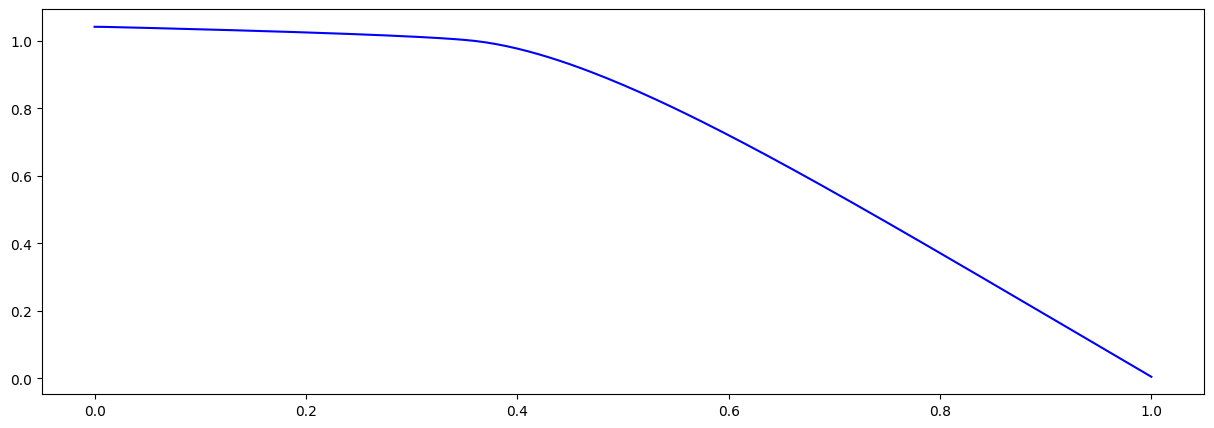

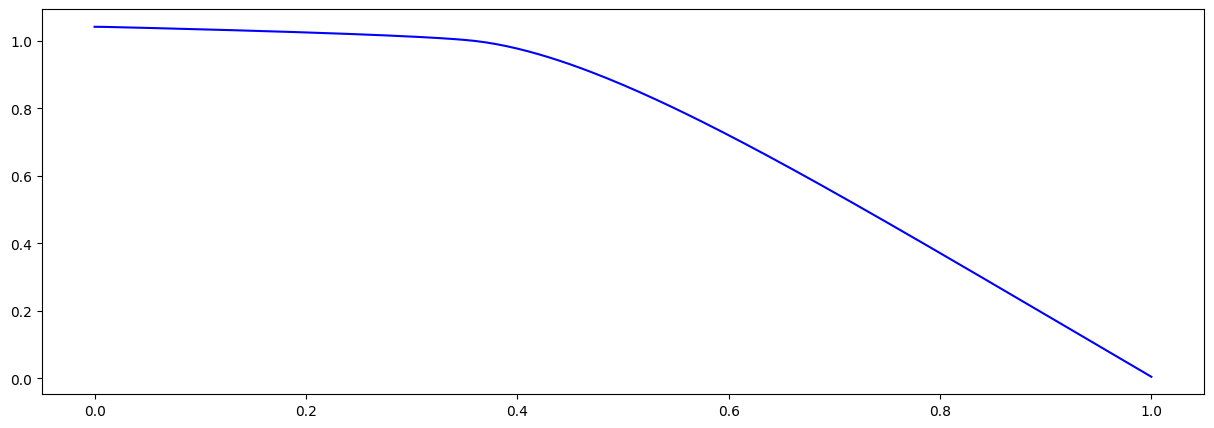

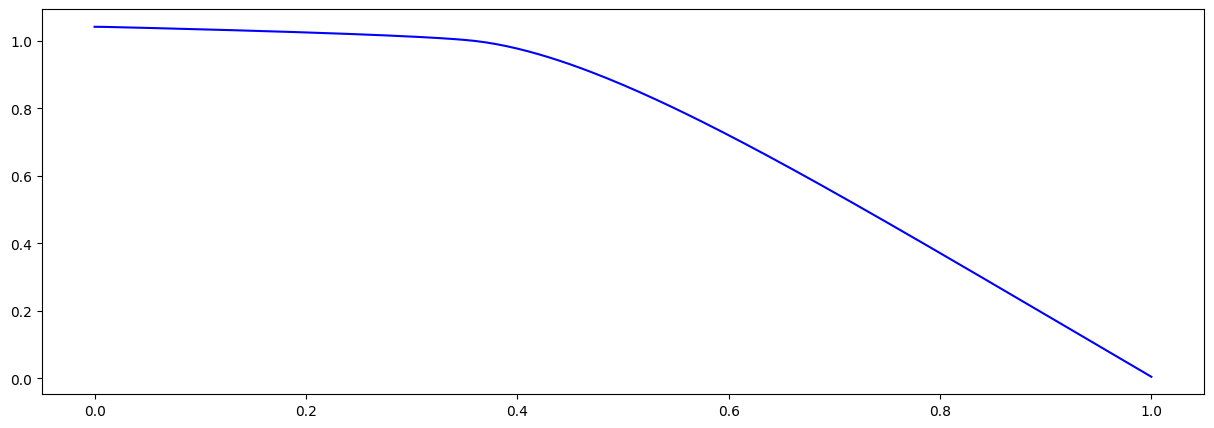

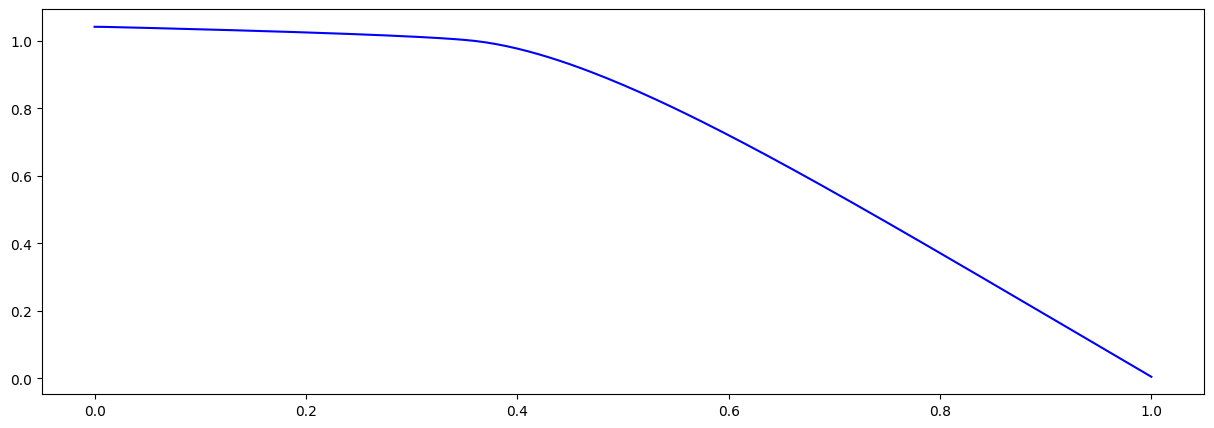

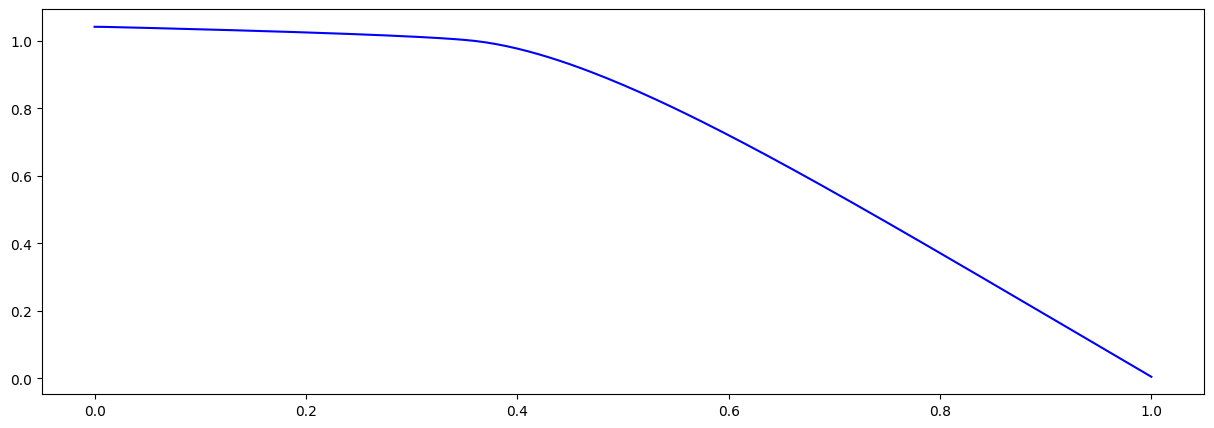

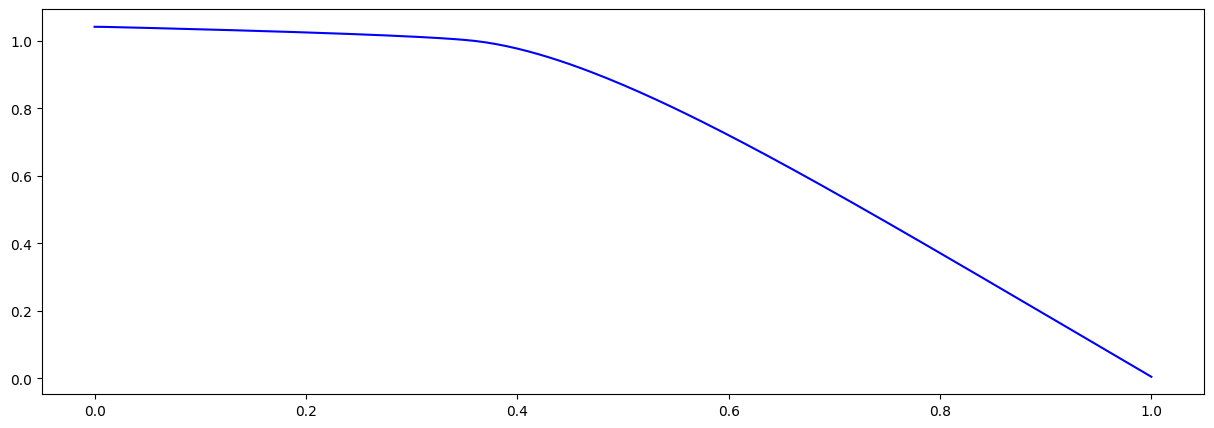

In [17]:
#the part relating to H>1 multiplied by (sign(H-1)+1)/2

#the part relating to H<1 multiplied by (sign(1-H)+1)/2
d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(nt):
    J[i+1]=J[i]+seep(J[i])*dt*(np.sign(J[i]-1)+1)/2 +fn(J[i])*dt*(np.sign(1-J[i])+1)/2
    J[i+1,0]=4.0/3.0*J[i+1,1]-1/3*J[i+1,2]# implementing boundary conditions
    if J[i+1,0]<=1 :    
        J[i+1,0]=1
    #J[i+1,nx-1]=0 #simplified
    #J[i+1,nx-1]= (-dx/(sigma) -1/2*J[i+1,nx-3]+2*J[i+1,nx-2])*2.0/3.0
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(15,5))  
        line,=ax.plot(x,J[i],color='blue',label='height')
print(J[nt,200])
print((J[nt,200]-J[nt,199])/dx)

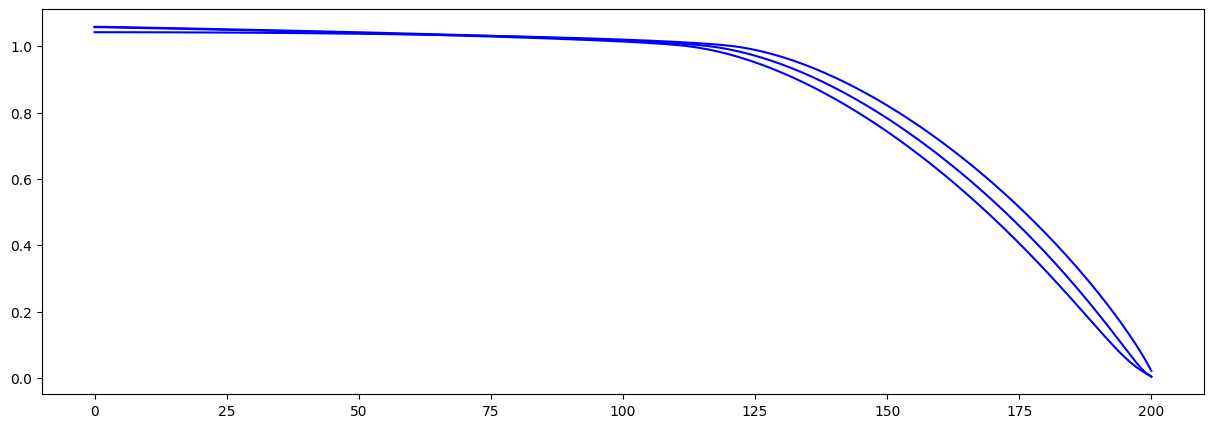

In [205]:
fig, ax = plt.subplots(figsize=(15,5)) 
line,=ax.plot(J[0],color='blue',label='height')
line,=ax.plot(J[500],color='blue',label='height')
line,=ax.plot(J[1000],color='blue',label='height')

In [89]:

line,=ax.plot(d1mat@J[0],color='blue',label='height')


1.0418131633171703
0.004594305813651368
1.0419751923191747
1.0197080095687001
0.021490574965241795


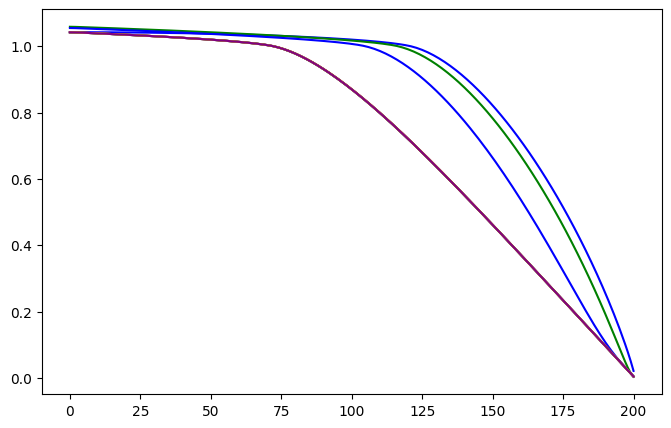

In [209]:
fig, ax = plt.subplots(figsize=(8,5))  
line,=ax.plot(J[0],color='blue',label='height')
line,=ax.plot(J[500],color='green',label='height')
line,=ax.plot(J[2000],color='blue',label='height')
line,=ax.plot(J[int(nt/5)],color='red',label='height')
line,=ax.plot(J[3*int(nt/10)],color='blue',label='height')
line,=ax.plot(J[5*int(nt/10)],color='green',label='height')
line,=ax.plot(J[7*int(nt/10)],color='purple',label='height')
line,=ax.plot(J[9*int(nt/10)],color='yellow',label='height')
line,=ax.plot(J[nt],color='purple',label='height')
print(J[nt,0])
print(J[nt,200])
print(J[0,0])
print(J[0,100])
print(J[0,200])

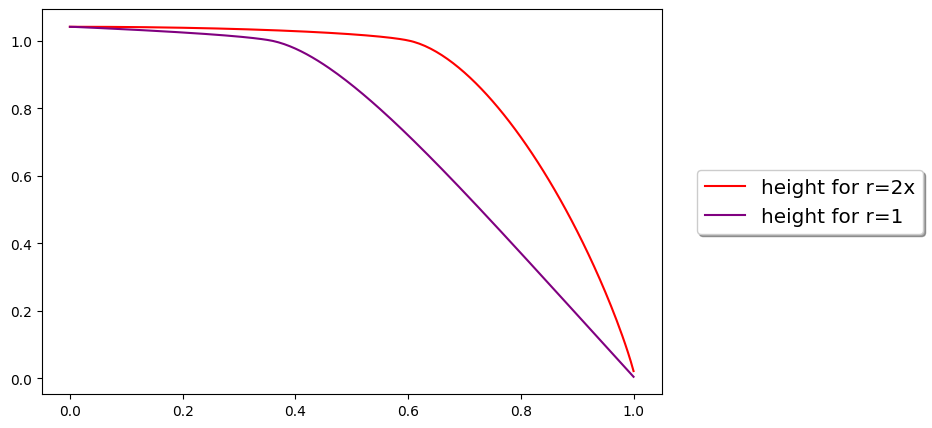

In [212]:
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(x,H[nt],color='red',label='height for r=2x' )
line,=ax.plot(x,J[nt],color='purple',label='height for r=1')
legend = ax.legend(bbox_to_anchor=(1.04,0.5), loc='center left', shadow=True, fontsize='x-large')


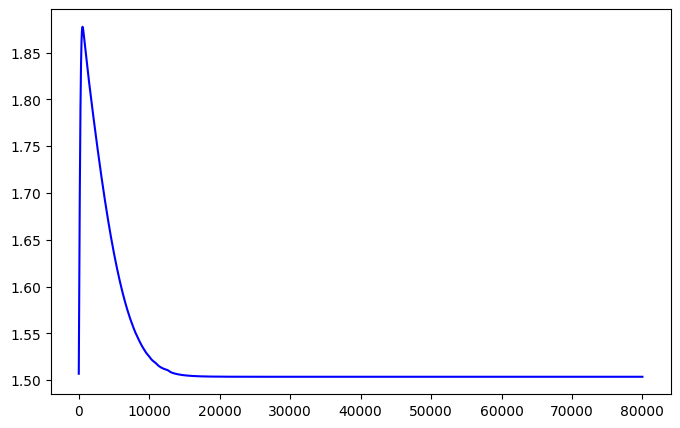

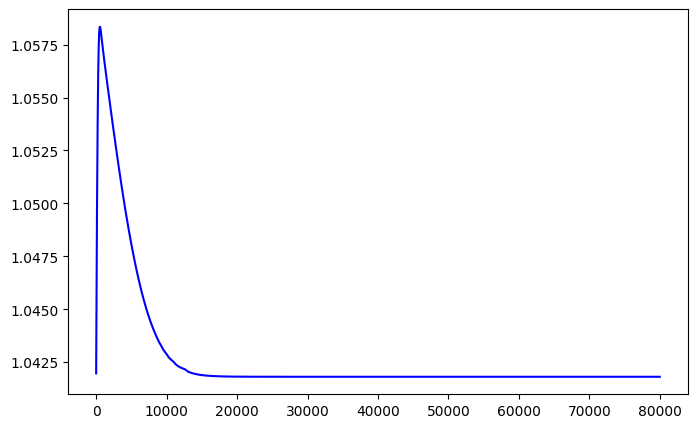

In [208]:
for j in range(nt-1):
    Q[j,0]=1+mu*(J[j,0]-1)**(5/3 )
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(Q[:nt-1,0],color='blue',label='height') 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(J[:,0],color='blue',label='height')

In [1]:

for i in range(nx):
    K[0,i]=J[nt,i]
    
print(J[0,0])
print(J[0,100])
print(J[0,200])
fig, ax = plt.subplots(figsize=(15,5))  
line,=ax.plot(J[0],color='blue',label='height')

NameError: name 'nx' is not defined

In [140]:
r=2*x
rho0=1
def seep(K): 
    c= sigma*d2mat@K + mu*5/3*(np.abs(K-1))**(2/3) *(d1mat@K)+rho0*r   #using a linear approximation
    return (c)

0.006933555441192898
-2.7244252975721897


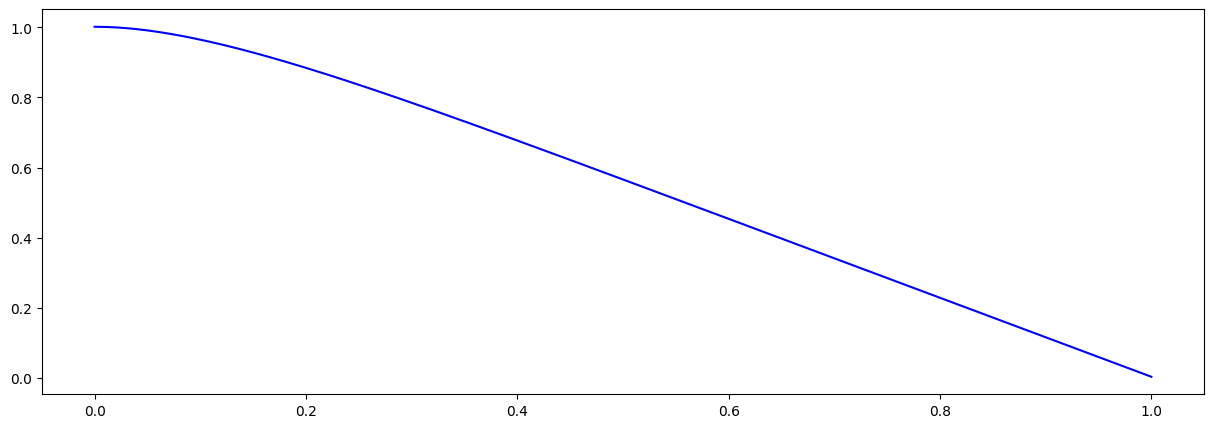

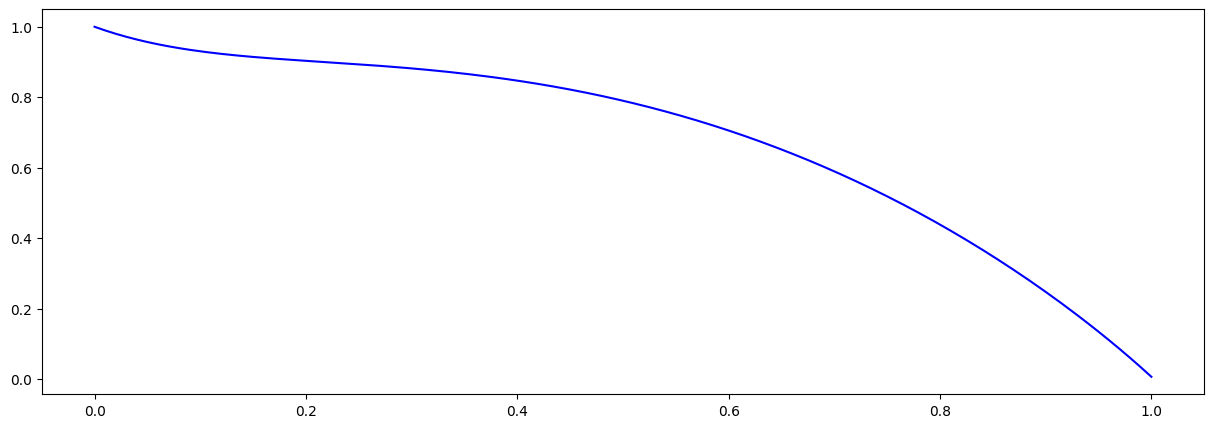

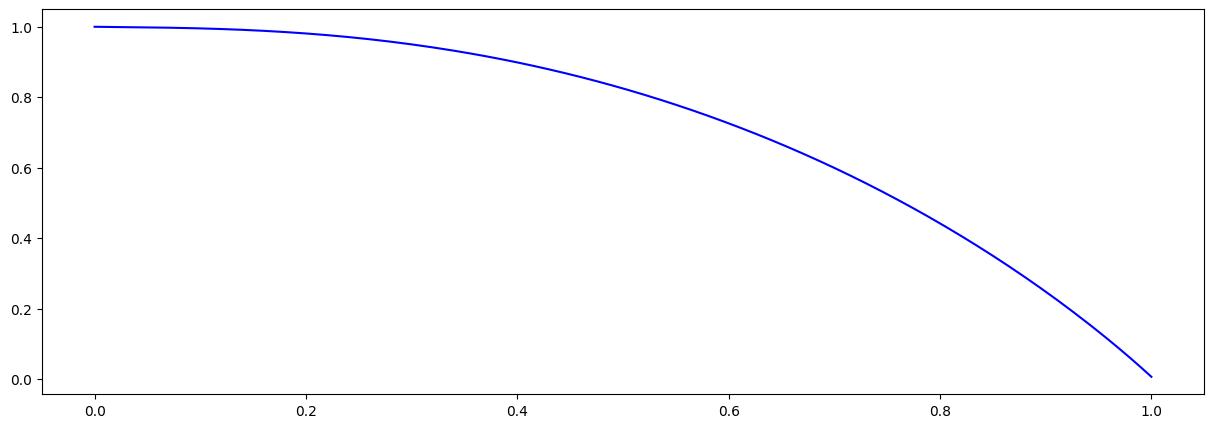

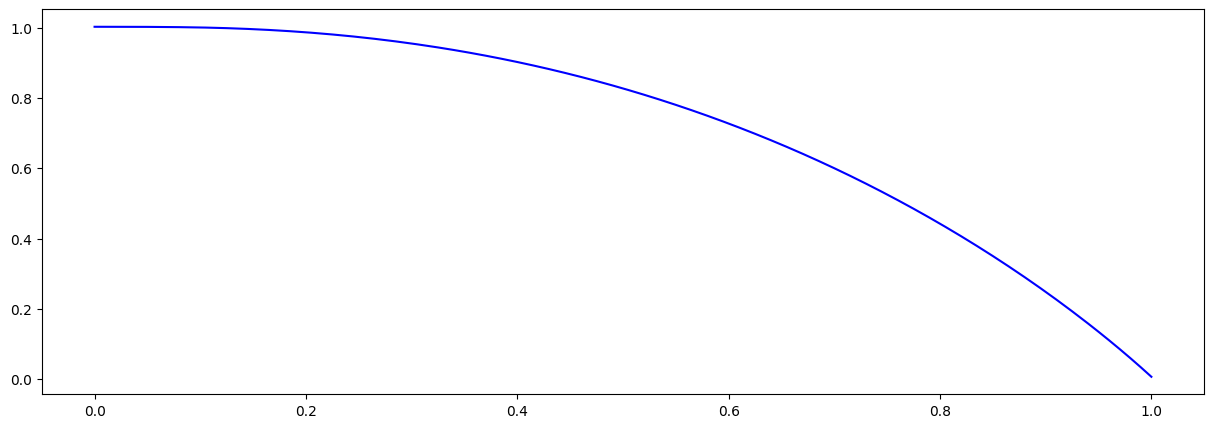

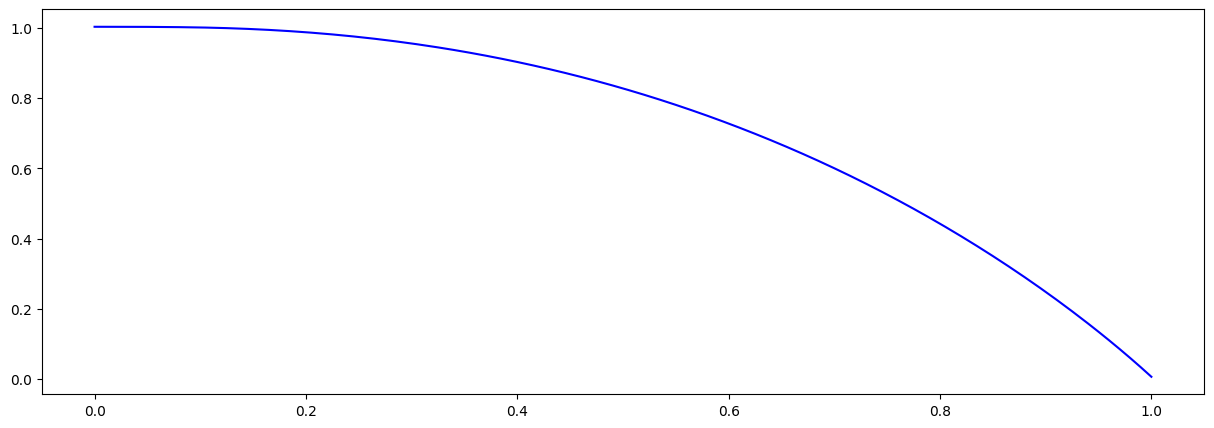

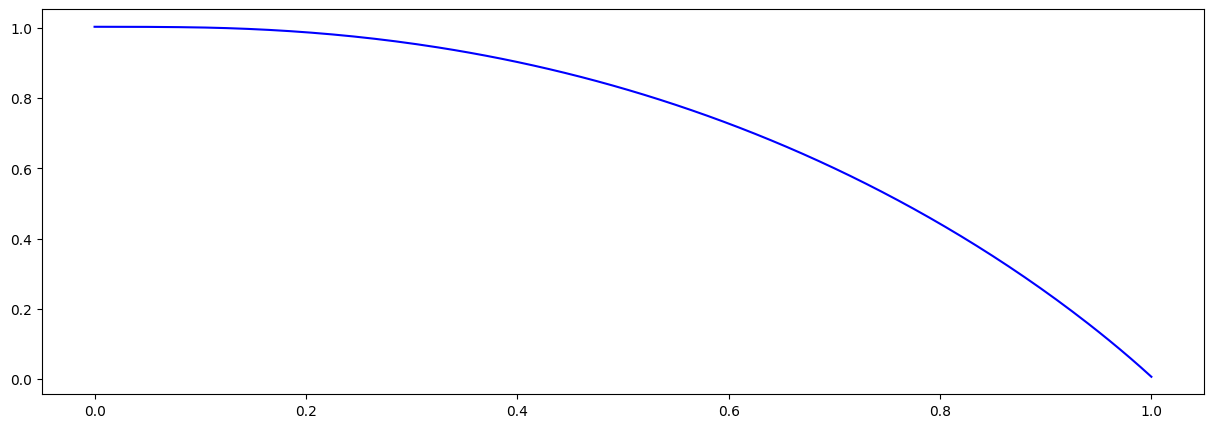

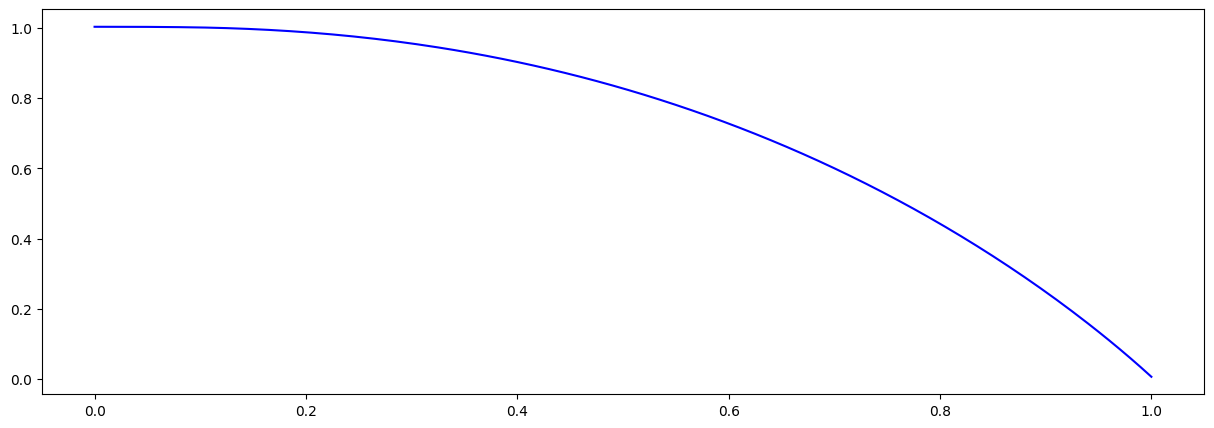

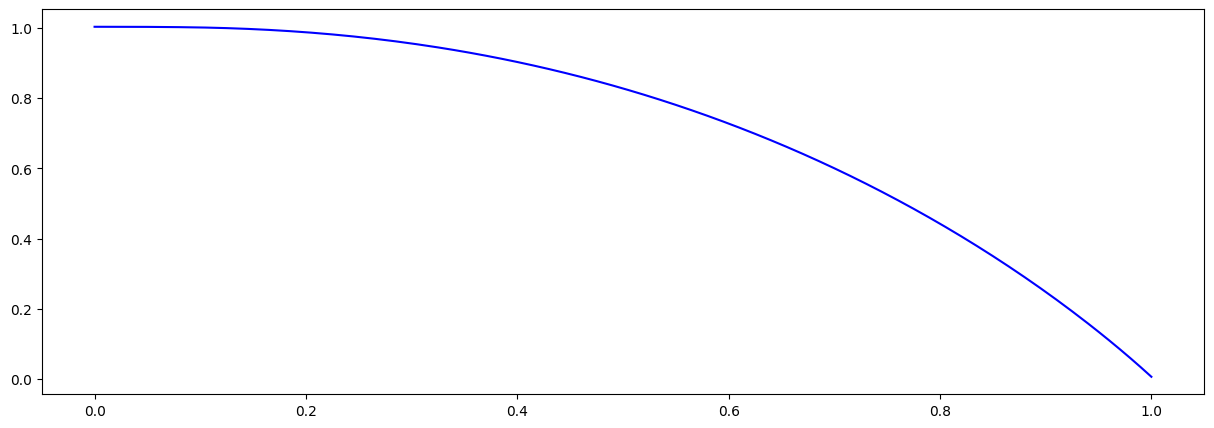

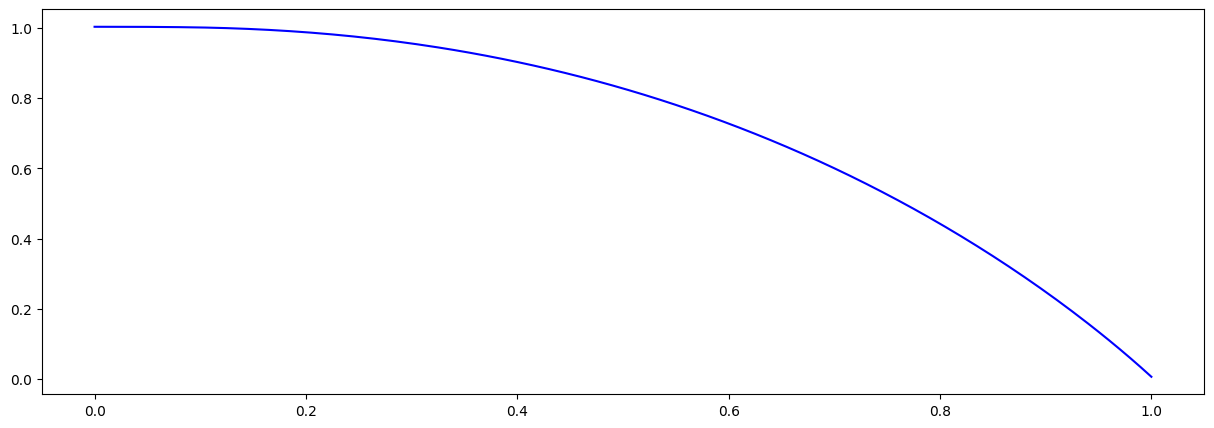

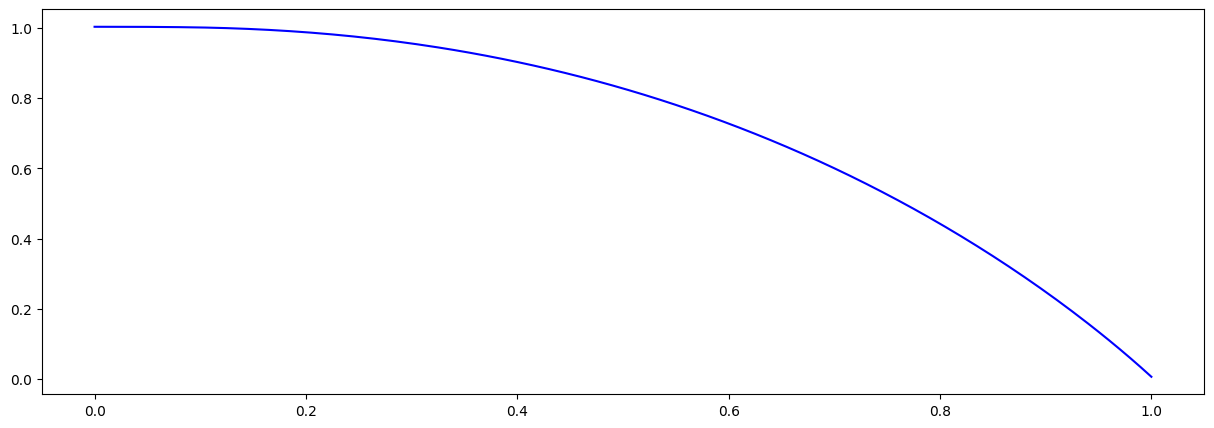

In [141]:
#the part relating to H>1 multiplied by (sign(H-1)+1)/2

#the part relating to H<1 multiplied by (sign(1-H)+1)/2
d1mat[nx-1,nx-2:nx]= np.array([-0.5,-0.5])/dx
d2mat[nx-1,nx-2:nx]= np.array([1,-1])/dx**2
for i in range(nt):
    K[i+1]=K[i]+seep(K[i])*dt*(np.sign(K[i]-1)+1)/2 +fn(K[i])*dt*(np.sign(1-K[i])+1)/2
    K[i+1,0]=4.0/3.0*K[i+1,1]-1/3*K[i+1,2]# implementing boundary conditions
    if K[i+1,0]<=1 :    
        K[i+1,0]=1
    #J[i+1,nx-1]=0 #simplified
    #J[i+1,nx-1]= (-dx/(sigma) -1/2*J[i+1,nx-3]+2*J[i+1,nx-2])*2.0/3.0
    if i%(nt/10)==0:
        fig, ax = plt.subplots(figsize=(15,5))  
        line,=ax.plot(x,K[i],color='blue',label='height')
print(K[nt,200])
print((K[nt,200]-K[nt,199])/dx)

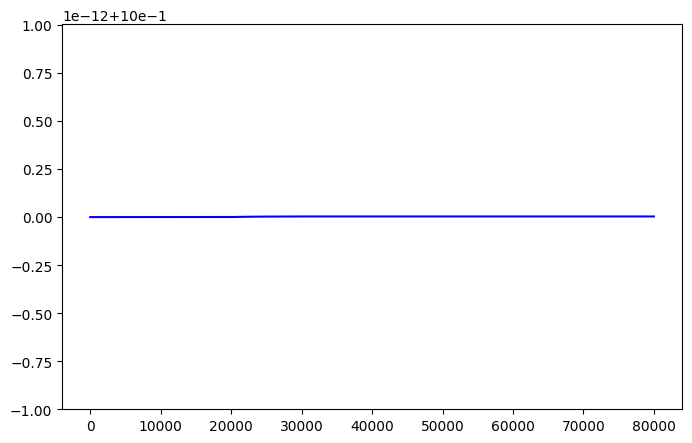

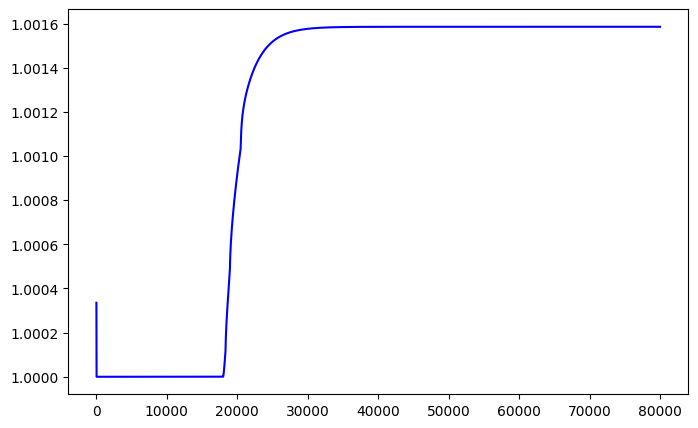

In [143]:
for j in range(nt-1):
    Q[j,0]=1+(J[j,0]-1)**5/3 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(Q[:nt-1,0],color='blue',label='height') 
fig, ax = plt.subplots(figsize=(8,5)) 
line,=ax.plot(J[:,0],color='blue',label='height')

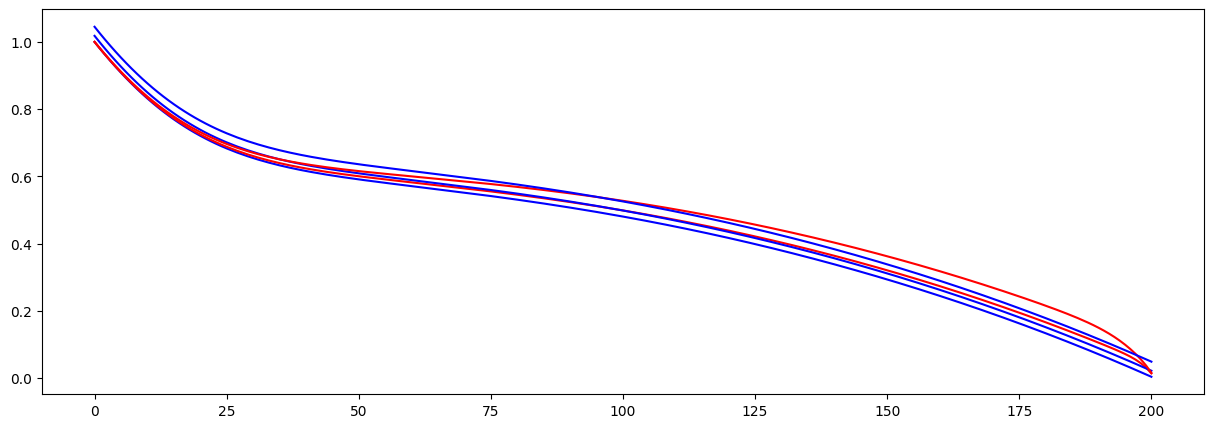

In [39]:
#a= J[0]+(rho-rho0)*t
fig, ax = plt.subplots(figsize=(15,5)) 
line,=ax.plot(J[0]+(rho0-0.6)*0,color='blue',label='height')
line,=ax.plot(J[200],color='red',label='height')
line,=ax.plot(J[0]+(rho0-0.6)*0.02,color='blue',label='height')
line,=ax.plot(J[500],color='red',label='height')
line,=ax.plot(J[0]+(rho0-0.6)*0.05,color='blue',label='height')

In [ ]:
once we get a seepage zone. rho much larger than one.Find a .Plot 6.2

In [ ]:
(Q[i+1]-Q[i-1])/(2*dx)

Q[i+1]= sigma*(H[i]+H[i+1])(H[i+1]-H[i])/(2*dx)

In [17]:

fig, ax = plt.subplots(figsize=(15,5))
line,=ax.plot(H[i],color='blue',label='initial condition')

In [69]:
a= 10

b=a
print(b)

10
